## Plot results of Bayesian optimisation registration 

Plots are based on tutorial from Randy Olsen
http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

In [189]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import ceil

In [190]:
def print_results(results):
    for k,v in results.items():
        print(k)
        for i,j in v.items():
            print(i,j)
        print()

In [191]:
def get_max(error_lists):
    max_values = [max(error_list) for error_list in error_lists]
    return max(max_values)

#### Read in results

In [192]:
# results_file = 'results/all_sparse_maxRot_prevbest_past_chck_reg.json'
full_simple_file = 'results/all_full_maxRot_simple_reg.json'
full_prevbest_file = 'results/all_full_maxRot_prevbest_pastChks_reg.json'
full_ltd_file = 'results/all_full_maxRot_ltd_pastChks_reg.json'
sparse_simple_file = 'results/all_sparse_maxRot_simple_reg.json'
sparse_prevbest_file = 'results/all_sparse_maxRot_prevbest_pastChks_reg.json'
sparse_ltd_file = 'results/all_sparse_maxRot_ltd_pastChks_reg.json'

full_simple_results = None
full_prevbest_results = None 
full_ltd_results = None 
sparse_simple_results = None
sparse_prevbest_results = None
sparse_ltd_results = None

results = [full_simple_file, full_prevbest_file, full_ltd_file,
           sparse_simple_file, sparse_prevbest_file, sparse_ltd_file]
method_results = [full_simple_results, full_prevbest_results, full_ltd_results,
                  sparse_simple_results, sparse_prevbest_results, sparse_ltd_results]
traj_indices = [str(x) for x in range(10)]

for i in range(len(results)):
    with open(results[i]) as fh:
        method_results[i] = json.load(fh)
    fh.close()

#### Store names
Used to retrieve from result dictionaries and plot legends

In [193]:
error_types = ['GT_error', 'bo_opt_error', 'comp_time', 'diff_to_GT_error',
               'global_opt_error']
method_names = ['full_simple', 'full_prevbest', 'full_ltd',
                'sparse_simple', 'sparse_prevbest', 'sparse_ltd']
full_methods = ['full_simple', 'full_prevbest', 'full_ltd']
sparse_methods = ['sparse_simple', 'sparse_prevbest', 'sparse_ltd']

#### User defined registration methods and errors to plot

In [194]:
#select methods to compare
full_simple = True
full_prevbest = False 
full_ltd = False
sparse_simple = True
sparse_prevbest = True
sparse_ltd = True

#select errors to compare
GT_error = True 
bo_opt_error = False 
diff_to_GT_error = False 
global_opt_error = True 
comp_time = False 

method_selectors = [full_simple, full_prevbest, full_ltd,
                    sparse_simple, sparse_prevbest, sparse_ltd]
error_selectors = [GT_error, bo_opt_error, comp_time, diff_to_GT_error,
               global_opt_error]

In [195]:
selected_method_results = [r for r, s in zip(method_results, method_selectors) if s]
selected_methods = [m for m, s in zip(method_names, method_selectors) if s]
selected_errors = [e for e, s in zip(error_types, error_selectors) if s]

In [196]:
all_data = {}
# for error_type in selected_errors:
#     all_data[error_type] = [[method_result[idx][error_type] for idx in traj_indices] for method_result in selected_method_results]

num_results = len(selected_methods)
#avoid selecting ground truth error multiple times from different methods 
#as its always the same 
num_GT_results = 0
sparse_GT_added = False
full_GT_added = False
for error_type in selected_errors:
    all_data[error_type] = []
    for idx, method_result in enumerate(selected_method_results):
        if error_type == 'GT_error':
                if sparse_GT_added and selected_methods[idx] in sparse_methods:
                    continue
                elif not sparse_GT_added and selected_methods[idx] in sparse_methods:
                    all_data[error_type].append([method_result[idx][error_type] for idx in traj_indices])
                    sparse_GT_added = True
                    num_GT_results += 1
                elif full_GT_added and selected_methods[idx] in full_methods:
                    continue
                elif not full_GT_added and  selected_methods[idx] in full_methods:
                    all_data[error_type].append([method_result[idx][error_type] for idx in traj_indices])
                    full_GT_added = True
                    num_GT_results += 1
        else:
            all_data[error_type].append([method_result[idx][error_type] for idx in traj_indices])
            


#### Plot selected registration methods and results

In [197]:
GT_present = 0
if num_GT_results: GT_present = 1
num_bars_per_subset = ((len(all_data) - (1 * GT_present)) * num_results) + num_GT_results
num_bars_per_subset += 1 #creates space between each sub trajectory

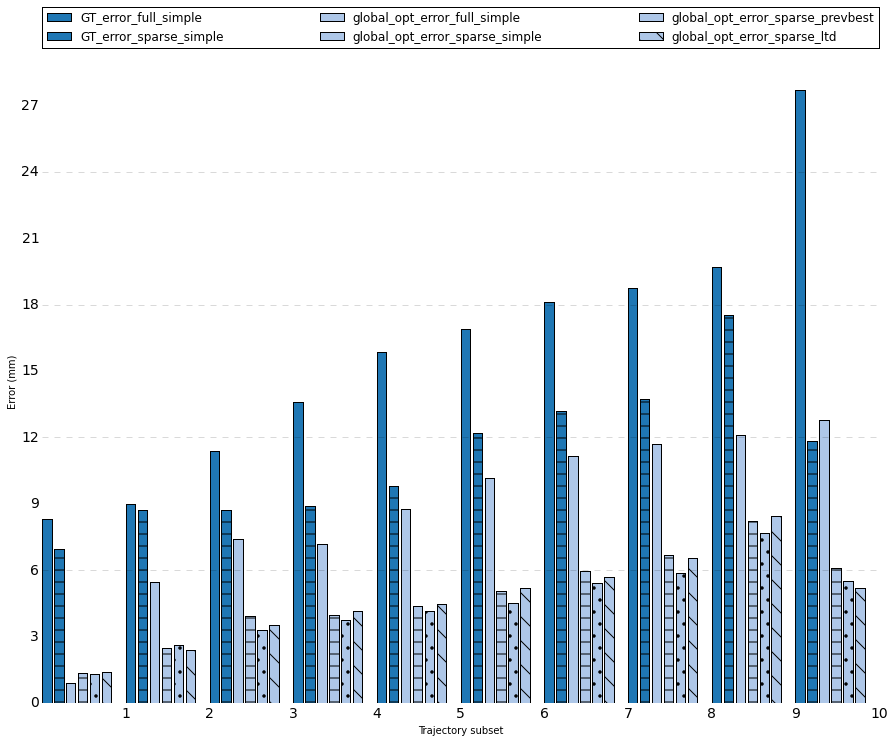

In [201]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

patterns = [None, '-',  '.', '\\', '*','x', 'o','+', 'O']

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(15, 11.5))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

N = len(traj_indices)
ind = np.arange(N)  # the x locations for the groups
# num_bars_per_subset = (len(all_data) * num_results) + num_GT_results
margin = 0.03
width = (1-(num_bars_per_subset * margin)) / num_bars_per_subset      # the width of the bars


# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
max_X = len(traj_indices) + 1
max_Y = 0
for error, results in all_data.items():
    max_found = get_max(results)
    if max_found > max_Y:
        max_Y = max_found
max_Y = ceil(max_Y) + 1
plt.ylim(0, max_Y)    
# plt.xlim(1968, 2014)    
  
plt.xticks(range(1,max_X), [str(x) for x in range(1, max_X)], fontsize=14)
tick_steps = ceil((max_Y + 1) / 10)
dash_steps = ceil((max_Y + 1) / 5)
#plot y markers
plt.yticks(range(0, max_Y+1, tick_steps), [str(x) for x in range(0, max_Y+1, tick_steps)], fontsize=14) 
#plot tick lines across plot
for y in range(0, max_Y+1, dash_steps):    
    plt.plot(range(0, max_X), [y] * len(range(0, max_X)), "--", lw=0.5, color="black", alpha=0.3)    
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    


full_result_set_width = num_results * (width + margin) 
GT_result_set_width = num_GT_results * (width + margin)
prev_result_set = 0
for rank, name in enumerate(selected_errors):
    for sub, data in enumerate(all_data[name]):
        idxs = np.arange(N) + (rank * prev_result_set) + (sub * (margin + width))
        labelname = name + '_' + selected_methods[sub]
        if len(selected_errors) > 1:
            ax.bar(idxs, all_data[name][sub], width, color=tableau20[rank], 
                   label=labelname, hatch=patterns[sub])
        else:
            ax.bar(idxs, all_data[name][sub], width, color=tableau20[sub], 
                   label=labelname)
    if name == 'GT_error':
        prev_result_set = GT_result_set_width
    else:
        prev_result_set = full_result_set_width
            
# add some text for labels, title and axes ticks
if 'comp_time' in selected_errors:
    ax.set_ylabel('Time (s)')
else:
    ax.set_ylabel('Error (mm)')
ax.set_xlabel('Trajectory subset')

# plt.legend(bbox_to_anchor=(1.003, 1.0), loc=2, borderaxespad=0.05)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()